# Cleaning Data in Python` :
> We will see in this **`hands-on training notebook`** how to effectively diagnose and treat missing data in **Python**.

## Introduction` :
> The majority of **data science work** often revolves around **pre-processing data**, and making sure it's **ready for analysis**. However, **`we will be covering how transform our raw data into accurate insights`**. In this notebook, we will see:
>* Import data into **`pandas`**, and use simple functions to diagnose problems in our data.
>* Visualize **missing** and **out of range** data using **`missingno`** and **`seaborn`**.
>* **Apply a range of data cleaning tasks** that will ensure the delivery of accurate insights.

## The Dataset` :
>The dataset to be used in this example is a CSV file named **`airbnb.csv`**, which contains data on **airbnb** listings in the state of New York. It contains the following columns:
>- **`listing_id`** : The unique identifier for a listing
>- **`description`** : The description used on the listing
>- **`host_id`** : Unique identifier for a host
>- **`host_name`** : Name of host
>- **`neighbourhood_full`** : Name of boroughs and neighbourhoods
>- **`coordinates`** : Coordinates of listing _(latitude, longitude)_
>- **`Listing added`** : Date of added listing
>- **`room_type`** : Type of room 
>- **`rating`** : Rating from 0 to 5.
>- **`price`** : Price per night for listing
>- **`number_of_reviews`** : Amount of reviews received 
>- **`last_review`** : Date of last review
>- **`reviews_per_month`** : Number of reviews per month
>- **`availability_365`** : Number of days available per year
>- **`Number of stays`** : Total number of stays thus far


## Getting started` :

In [1]:
# Import libraries :

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
# render figures directly in the notebook :
%matplotlib inline
# render higher resolution images :
%config InlineBackend.figure_format = 'retina'


# Seaborn is a Python data visualization library based on matplotlib :
import seaborn as sns 

# Missing data visualization module for Python :
import missingno as msno 
import datetime as dt

> - **`Seaborn`** is an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data analysis.
> - **`Missingno`** is an excellent and simple to use Python library that provides a series of visualisations to understand the presence and distribution of missing data within a pandas dataframe.


In [2]:
# Reading the dataset with pandas :
airbnb = pd.read_csv('airbnb.csv', index_col = 'Unnamed: 0')

In [3]:
# Displaying the 5 first and last rows of the dataset :
airbnb

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,"Manhattan, Harlem","(40.80379, -73.95257)",Entire home/apt,105$,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22
10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,"Manhattan, East Harlem","(40.79531, -73.9333)",Entire home/apt,125$,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31
10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,"Brooklyn, Clinton Hill","(40.68266, -73.96743000000002)",Entire home/apt,100$,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24
10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,"Brooklyn, Clinton Hill","(40.68832, -73.96366)",Entire home/apt,450$,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25


- **10019** is the number of records in our dataset.
- **16** is the number of columns.

##`Diagnosing data cleaning problems using simple pandas` :

Some important and common methods needed to **get a better understanding of DataFrames** and **diagnose potential data problems** are the following: 

> - **`.head()`** prints the **header** of a DataFrame.
> - **`.dtypes`** prints **datatypes** of all columns in a DataFrame.
> - **`.info()`** provides a bird's eye view of column **data types** and **missing values** in a DataFrame.
> - **`.describe()`** returns a **distribution of numeric columns** in your DataFrame.
> - **`.isna().sum()`** allows us to break down the **number of missing values per column** in our DataFrame.
> - **`.unique()`** finds the **number of unique values** in a DataFrame column.
> - **`sns.displot()`** **plots the distribution of one column** in your DataFrame.

In [4]:
# Print the header of the DataFrame :
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


By merely looking at the data, we can already diagnose a range of potential problems down the line such as :

#### `Data type problems` :
>- **`Problem 1`** : We can see that the **`coordinates`** column is probably a string `str` - most mapping functions require a **latitude input**, and **longitude input**, so it's best to **split this column into two** and **convert the values to** `float`.

>- **`Problem 2`** : Similar to **`coordinates`** - the **`price`** column also is a string with `$` attached to each price point, we need to **convert that to** `float` if we want a good understanding of the dataset. 

> - **`Problem 3`** : We need to make sure date columns **`last_review`** and **`listing_added`** are in `datetime` to allow easier manipulation of data data.

####  `Missing data problems` :
> - **`Problem 4`** : We can see that **there are missing data in some columns**, we'll get a better bird's eye view of that down the line.


####  `Text/categorical data problems` :
> - **`Problem 5`** : To be able to visualize number of listings by boroughs - we need to **separate neighborhoud name from borough name** in **`neighbourhood_full`** column.

> - **`Problem 6`** : Looking at **`room_type`**, let's replace those values to make them `Shared Room`, `Private Home/Apartment`, `Private Room` and `Hotel Room`.

In [5]:
# Print data types of DataFrame :
airbnb.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
dtype: object

> - Printing the data types confirms that : 
>     - **`coordinates`** and **`price`** need to be converted to `float` : **`problems 1, 2`**
>     - **`last_review`** and **`listing_added`** columns need to be converted to `datetime` : **`problem 3`**

In [6]:
# Print info of DataFrame :
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10019 entries, 0 to 10018
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          10019 non-null  int64  
 1   name                10014 non-null  object 
 2   host_id             10019 non-null  int64  
 3   host_name           10017 non-null  object 
 4   neighbourhood_full  10019 non-null  object 
 5   coordinates         10019 non-null  object 
 6   room_type           10019 non-null  object 
 7   price               9781 non-null   object 
 8   number_of_reviews   10019 non-null  int64  
 9   last_review         7944 non-null   object 
 10  reviews_per_month   7944 non-null   float64
 11  availability_365    10019 non-null  int64  
 12  rating              7944 non-null   float64
 13  number_of_stays     7944 non-null   float64
 14  5_stars             7944 non-null   float64
 15  listing_added       10019 non-null  object 
dtypes: f

> - Printing the info confirms our hunch about the following :
>     - There is missing data in the **`price`**, **`last_review`**, **`reviews_per_month`**, **`rating`**, **`number_of_stays`**, **`5_stars`** columns : **`problem 4`**
>     - The missingness of **`last_review`**, **`reviews_per_month`**, **`rating`**, **`number_of_stays`**, **`5_stars`** are related since they have the same amount of missing data. We will confirm later with **`missingno`** : **`problem 4`**

In [6]:
# Print number of missing values :
airbnb.isna().sum()

listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

> There are a variety of ways of **dealing with missing data** that is dependent on type of missingness, as well as the business assumptions behind our data - our options could be :
> - **Dropping missing data** (if the data dropped does not impact or skew our data)
> - **Setting to missing and impute with statistical measures** (median, mean, mode ...)
> - **Impute based on business assumptions of our data**.

In [7]:
# Print description of DataFrame :
airbnb.describe()

,listing_id,host_id,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars
count,1.001900e+04,1.001900e+04,10019.000000,7944.000000,10019.000000,7944.000000,7944.000000,7944.000000
mean,1.927634e+07,6.795923e+07,22.459727,1.353894,112.284260,4.014458,33.991541,0.718599
std,1.095056e+07,7.863106e+07,43.173896,1.615380,131.636043,0.575064,56.089279,0.079978
min,3.831000e+03,2.787000e+03,0.000000,0.010000,0.000000,3.000633,1.200000,0.600026
25%,9.674772e+06,7.910880e+06,1.000000,0.200000,0.000000,3.520443,3.600000,0.655576
50%,2.007030e+07,3.165167e+07,5.000000,0.710000,44.000000,4.027965,10.800000,0.709768
75%,2.933864e+07,1.074344e+08,22.000000,2.000000,226.000000,4.516378,38.400000,0.763978
max,3.648724e+07,2.741034e+08,510.000000,16.220000,365.000000,5.181114,612.000000,0.950339


> - **`Problem 7`** : Looking at the maximum of the **`rating`** column - we see that it is out of range of `5` which is the maximum rating possible. We need to make sure we fix the range this column.
> - It's worth noting that `.describe()` does not offer a bird's eye view of all the out of range data we have, for example, what if we have date data in the future? Or given our dataset, **`listing_added`** dates that are in the future of **`last_review`** dates ? 

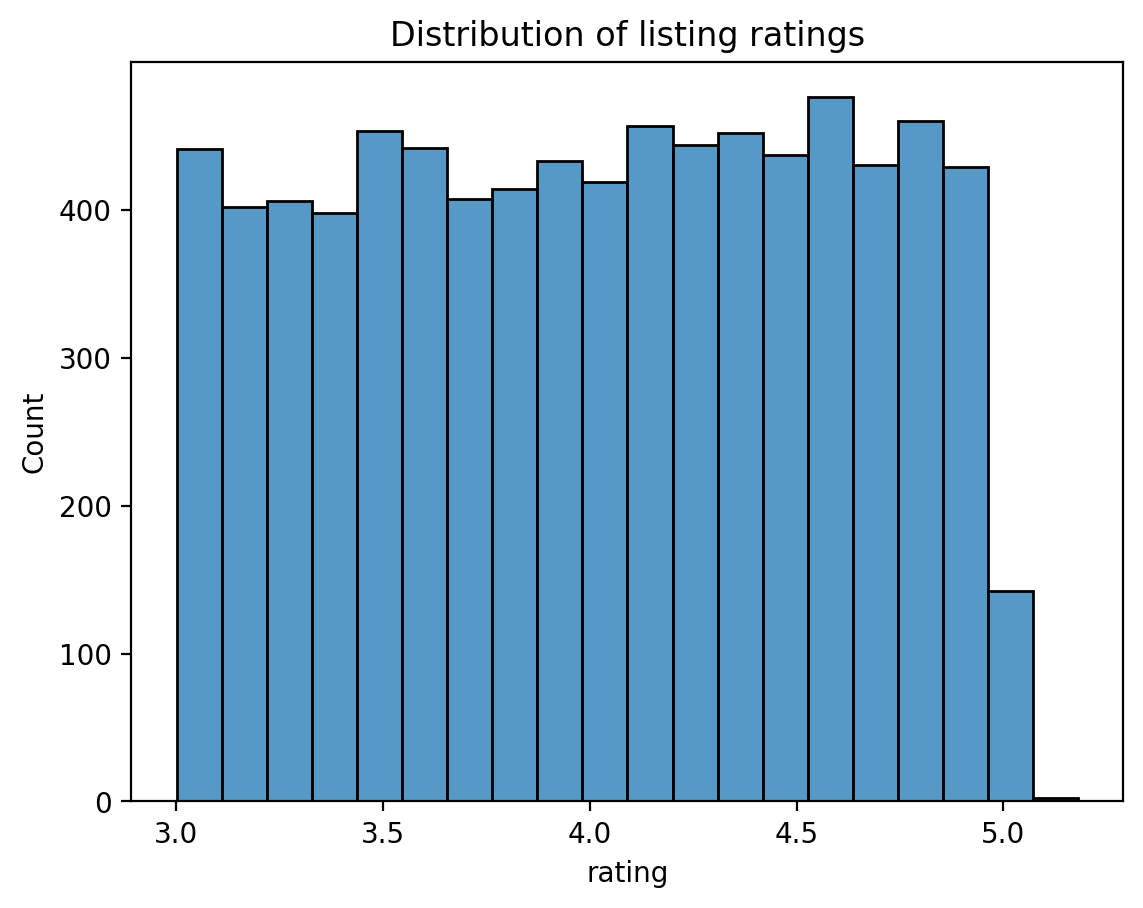

In [8]:
# Visualize the distribution of the rating column :
sns.histplot(airbnb['rating'], bins = 20)
plt.title('Distribution of listing ratings')
plt.show()

In [9]:
# Find number of unique values in room_type column :
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

> - **`Problem 8`**: There are **trailing spaces** and **capitalization issues** with `room_type`, we need to fix this problem.

In [10]:
# How many values of different room_types do we have?
airbnb['room_type'].value_counts()

room_type
Entire home/apt         5120
Private room            4487
Shared room              155
Private                   89
   Shared room            71
home                      66
PRIVATE ROOM              31
Name: count, dtype: int64

##  `Our to do list` :

#### `Data type problems` :
>-  1️⃣ **`Task 1`** : Split **`coordinates`** into 2 columns and convert them to `float`
>-  2️⃣ **`Task 2`** : Remove `$` from **`price`** and convert it to `float`
>-  3️⃣ **`Task 3`** : Convert **`listing_added`** and **`last_review`** to `datetime`


####  `Text/categorical data problems` :
>-  4️⃣ **`Task 4`** : We need to collapse **`room_type`** into correct categories
>-  5️⃣ **`Task 5`** : Divide **`neighbourhood_full`** into 2 columns and making sure they are clean

####  `Data range problems` :
>-  6️⃣ **`Task 6`** : Make sure we set the correct maximum for **`rating`** column out of range values

####  `Missing data problems` :
>-  7️⃣ **`Task 7`** : Understand the type of missingness, and deal with the missing data in most of the remaining columns.
>-  7️⃣.1️⃣ **`Task 7.1`** : Treating the**`rating`**, **`number_of_stays`**, **`5_stars`**, **`reviews_per_month`** columns.


####  `Is that all though?` :
>- We need to make sure that data makes sense by applying some sanity checks on our DataFrame.
>  -  8️⃣ **`Task 8`** :  Do we have consistent date data ?
>- We need to investigate if we duplicates in our data.
>  -  9️⃣ **`Task 9`** :  Let's deal with duplicate data !

##  `Data type problems` :

In [11]:
# Reminder of the DataFrame :
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


#### 1️⃣   `Task 1`  : Replace `coordinates` with `latitude` and `longitude` columns :
> To perform this task, we will use the following methods :
> - **`.str.replace("","")`** replaces one string in each row of a column with another
> - **`.str.split("")`** takes in a string and lets you split a column into two based on that string
> - **`.astype()`** lets you convert a column from one type to another

In [12]:
# Removing "(" and ")" from coordinates : 
airbnb['coordinates'] = airbnb['coordinates'].str.replace("(","") # Deleting "(" 
airbnb['coordinates'] = airbnb['coordinates'].str.replace(")","") # Deleting ")" 

# Printing the header of the column :
airbnb['coordinates'].head()

0    40.63222, -73.93398
1    40.78761, -73.96862
2     40.7007, -73.99517
3    40.79169, -73.97498
4    40.71884, -73.98354
Name: coordinates, dtype: object

In [14]:
# Spliting coordinates column into two new columns : lat_long[0] and lat_long[1] 
lat_long = airbnb['coordinates'].str.split(",", expand = True)
lat_long.head()

,0,1
0,40.63222,-73.93398
1,40.78761,-73.96862
2,40.7007,-73.99517
3,40.79169,-73.97498
4,40.71884,-73.98354


In [15]:
# Assigning correct columns to latitude and longitude columns in airbnb
airbnb['latitude'] = lat_long[0]
airbnb['longitude'] = lat_long[1]
# Print the header and confirm new column creation
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","40.63222, -73.93398",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","40.78761, -73.96862",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","40.7007, -73.99517",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.7007,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","40.79169, -73.97498",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","40.71884, -73.98354",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


In [16]:
# Print out dtypes again
airbnb.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude               object
longitude              object
dtype: object

In [17]:
# Converting latitude and longitude to float :
airbnb['latitude'] = airbnb['latitude'].astype('float')
airbnb['longitude'] = airbnb['longitude'].astype('float')

# Print dtypes again :
airbnb.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longitude             float64
dtype: object

In [18]:
# Droping coordinates column :
airbnb.drop('coordinates', axis = 1, inplace = True)

In [19]:
help(airbnb.drop)

Help on method drop in module pandas.core.frame:

drop(labels: 'IndexLabel | None' = None, *, axis: 'Axis' = 0, index: 'IndexLabel | None' = None, columns: 'IndexLabel | None' = None, level: 'Level | None' = None, inplace: 'bool' = False, errors: 'IgnoreRaise' = 'raise') -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Drop specified labels from rows or columns.

    Remove rows or columns by specifying label names and corresponding
    axis, or by directly specifying index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level. See the :ref:`user guide <advanced.shown_levels>`
    for more information about the now unused levels.

    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop. A tuple will be used as a single
        label and not treated as a list-like.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels fr

#### 2️⃣    `Task 2`  : Remove `$` from `price` and convert it to `float` :
> To perform this task, we will be using the following methods:
> - **`.str.strip()`** which removes a specified string from each row in a column.
> - **`.astype()`**

In [20]:
# Calculate mean of price without conversion :
airbnb['price'].mean()

TypeError: can only concatenate str (not "int") to str

- As expected we got an error 🤔, the **mean** of the price column cannot be calculated because its data type is `str`

In [21]:
# Remove $ from price before conversion to float
airbnb['price'] = airbnb['price'].str.strip("$")
# Print header to make sure change was done
airbnb['price'].head()

0     45
1    135
2    150
3     86
4    160
Name: price, dtype: object

In [22]:
# Convert price to float
airbnb['price'] = airbnb['price'].astype('float')
# Calculate mean of price after conversion
airbnb['price'].mean()

150.90512217564665

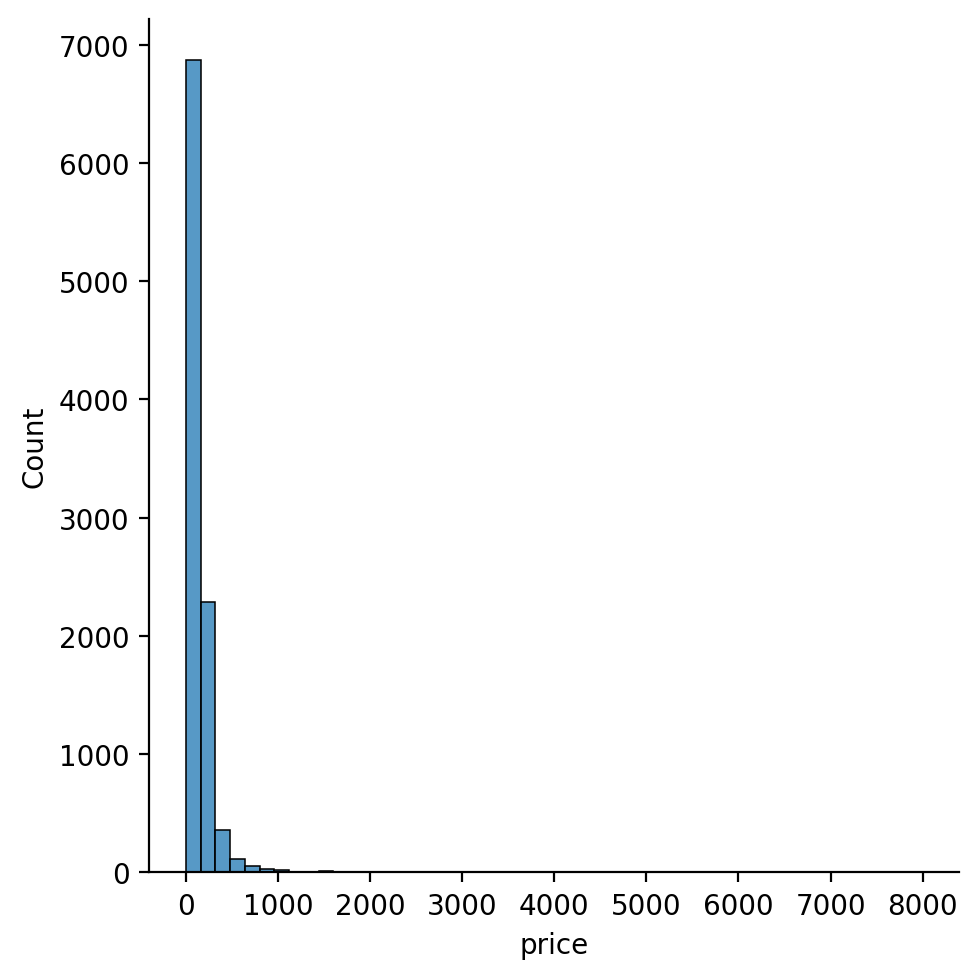

In [23]:
# Visualize distribution of prices
sns.displot(airbnb['price'], bins = 50)
plt.show()

#### 3️⃣   `Task 3`  : Convert `listing_added` and `last_review` columns to `datetime` :
> To perform this task, we will use the following functions :
> - **`pd.to_datetime(format = "")`**
>      - **`format`** takes in the desired date format **`"%Y-%m-%d"`**

In [24]:
# Printing header of two columns :
airbnb[['listing_added', 'last_review']].head()

,listing_added,last_review
0,2018-06-08,2018-12-12
1,2018-12-25,2019-06-30
2,2018-08-15,NaN
3,2017-03-20,2017-09-23
4,2020-10-23,2019-06-12


In [25]:
# Converting both columns to datetime :
airbnb['listing_added'] = pd.to_datetime(airbnb['listing_added'], format = '%Y-%m-%d')
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'], format = '%Y-%m-%d')

In [26]:
# Printing header of two columns :
airbnb[['listing_added', 'last_review']].head()

,listing_added,last_review
0,2018-06-08,2018-12-12
1,2018-12-25,2019-06-30
2,2018-08-15,NaT
3,2017-03-20,2017-09-23
4,2020-10-23,2019-06-12


In [27]:
# Printing datatypes of both columns :
airbnb[['listing_added', 'last_review']].dtypes

listing_added    datetime64[ns]
last_review      datetime64[ns]
dtype: object

#### 4️⃣   `Task 4`  : Collapsing `room_type` into correct categories :
>To perform this task, we will be using the following methods :
> - **`.str.lower()`** to lowercase all rows in a string column.
> - **`.str.strip()`** to remove all white spaces of each row in a string column.
> - **`.replace()`** to replace values in a column with another.

In [28]:
# Printing unique values of `room_type` :
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [29]:
# Dealing with capitalized values :
airbnb['room_type'] = airbnb['room_type'].str.lower()
airbnb['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home', '   shared room      '], dtype=object)

In [30]:
# Dealing with trailing spaces :
airbnb['room_type'] = airbnb['room_type'].str.strip()
airbnb['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home'], dtype=object)

In [31]:
# Replacing values to 'Shared room', 'Entire place', 'Private room' and 'Hotel room' (if applicable).
mappings = {'private room': 'Private Room', 
            'private': 'Private Room',
            'entire home/apt': 'Entire place',
            'shared room': 'Shared room',
            'home': 'Entire place'}

# Replacing values and collapsing data :
airbnb['room_type'] = airbnb['room_type'].replace(mappings)
airbnb['room_type'].unique()

array(['Private Room', 'Entire place', 'Shared room'], dtype=object)

#### 5️⃣   `Task 5`  : Dividing `neighbourhood_full` into 2 columns and making sure they are clean :

In [32]:
# Printing header of column :
airbnb['neighbourhood_full'].head()

0           Brooklyn, Flatlands
1    Manhattan, Upper West Side
2    Brooklyn, Brooklyn Heights
3    Manhattan, Upper West Side
4    Manhattan, Lower East Side
Name: neighbourhood_full, dtype: object

In [33]:
# Spliting neighbourhood_full :
borough_neighbourhood = airbnb['neighbourhood_full'].str.split(",", expand = True)
borough_neighbourhood.head()

,0,1
0,Brooklyn,Flatlands
1,Manhattan,Upper West Side
2,Brooklyn,Brooklyn Heights
3,Manhattan,Upper West Side
4,Manhattan,Lower East Side


In [34]:
# Creating borough and neighbourhood columns :
airbnb['borough'] = borough_neighbourhood[0]
airbnb['neighbourhood'] = borough_neighbourhood[1]

# Printing header of the recently created columns :
airbnb[['neighbourhood_full', 'borough', 'neighbourhood']].head()

,neighbourhood_full,borough,neighbourhood
0,"Brooklyn, Flatlands",Brooklyn,Flatlands
1,"Manhattan, Upper West Side",Manhattan,Upper West Side
2,"Brooklyn, Brooklyn Heights",Brooklyn,Brooklyn Heights
3,"Manhattan, Upper West Side",Manhattan,Upper West Side
4,"Manhattan, Lower East Side",Manhattan,Lower East Side


In [35]:
# Droping the neighbourhood_full column :
airbnb.drop('neighbourhood_full', axis = 1, inplace = True)

In [36]:
# Printing out unique values of borough :
airbnb['borough'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [37]:
# Printing out unique values of neighbourhood :
airbnb['neighbourhood'].unique()

array([' Flatlands', ' Upper West Side', ' Brooklyn Heights',
       ' Lower East Side', ' Greenwich Village', ' Harlem',
       ' Sheepshead Bay', ' Theater District', ' Bushwick', ' Laurelton',
       ' Mott Haven', ' Flushing', ' Crown Heights', ' Midtown',
       ' Financial District', ' East Village', ' Park Slope',
       ' Washington Heights', ' Williamsburg', ' Chelsea',
       ' Bedford-Stuyvesant', ' Gowanus', ' Upper East Side',
       ' Ditmars Steinway', ' Cypress Hills', " Hell's Kitchen",
       ' Ridgewood', ' Marble Hill', ' Kips Bay', ' Prospect Heights',
       ' East New York', ' Concord', ' Stapleton', ' Astoria',
       ' East Harlem', ' Sunnyside', ' Gramercy',
       ' Prospect-Lefferts Gardens', ' Sunset Park', ' Forest Hills',
       ' Windsor Terrace', ' Clinton Hill', ' Murray Hill',
       ' Flatiron District', ' Greenpoint', ' East Flatbush', ' Tribeca',
       ' Woodhaven', ' Fort Greene', ' Inwood', ' Chinatown',
       ' Rockaway Beach', ' Woodside', ' 

In [38]:
# Striping white space from neighbourhood column :
airbnb['neighbourhood'] = airbnb['neighbourhood'].str.strip()

# Printing unique values again :
airbnb['neighbourhood'].unique()

array(['Flatlands', 'Upper West Side', 'Brooklyn Heights',
       'Lower East Side', 'Greenwich Village', 'Harlem', 'Sheepshead Bay',
       'Theater District', 'Bushwick', 'Laurelton', 'Mott Haven',
       'Flushing', 'Crown Heights', 'Midtown', 'Financial District',
       'East Village', 'Park Slope', 'Washington Heights', 'Williamsburg',
       'Chelsea', 'Bedford-Stuyvesant', 'Gowanus', 'Upper East Side',
       'Ditmars Steinway', 'Cypress Hills', "Hell's Kitchen", 'Ridgewood',
       'Marble Hill', 'Kips Bay', 'Prospect Heights', 'East New York',
       'Concord', 'Stapleton', 'Astoria', 'East Harlem', 'Sunnyside',
       'Gramercy', 'Prospect-Lefferts Gardens', 'Sunset Park',
       'Forest Hills', 'Windsor Terrace', 'Clinton Hill', 'Murray Hill',
       'Flatiron District', 'Greenpoint', 'East Flatbush', 'Tribeca',
       'Woodhaven', 'Fort Greene', 'Inwood', 'Chinatown',
       'Rockaway Beach', 'Woodside', 'Bayside', 'Bensonhurst', 'SoHo',
       'Red Hook', 'West Village', 

#### 6️⃣   `Task 6`  : Making sure we set the correct maximum for `rating` column out of range values :

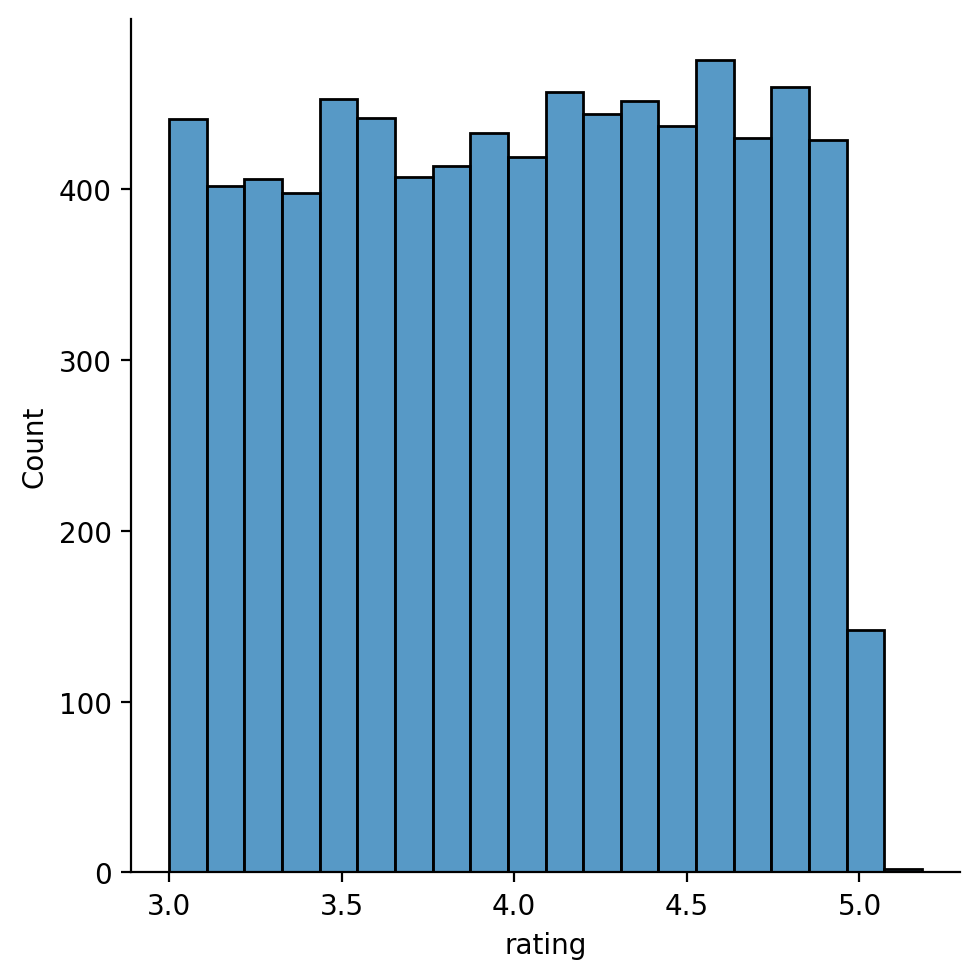

In [39]:
# Visualizing the rating column again :
sns.displot(airbnb['rating'], bins = 20)
plt.show()

In [40]:
# Isolating rows of rating > 5.0
airbnb[airbnb['rating'] > 5.0]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood
1925,36411407,Brand new 1 bedroom steps from Soho!,33917435,Mike,Entire place,150.0,1,2019-07-06,1.0,13,5.017040,1.2,0.870161,2018-12-31,40.71825,-73.99019,Manhattan,Lower East Side
6732,36390226,Comfortable clean Bedstuy private room,267932490,Angela,Private Room,45.0,2,2019-07-08,2.0,14,5.087091,2.4,0.950339,2019-01-02,40.69551,-73.93951,Brooklyn,Bedford-Stuyvesant
8821,36413632,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Entire place,550.0,1,2019-07-07,1.0,230,5.181114,1.2,0.805418,2019-01-01,40.69827,-73.99649,Brooklyn,Brooklyn Heights


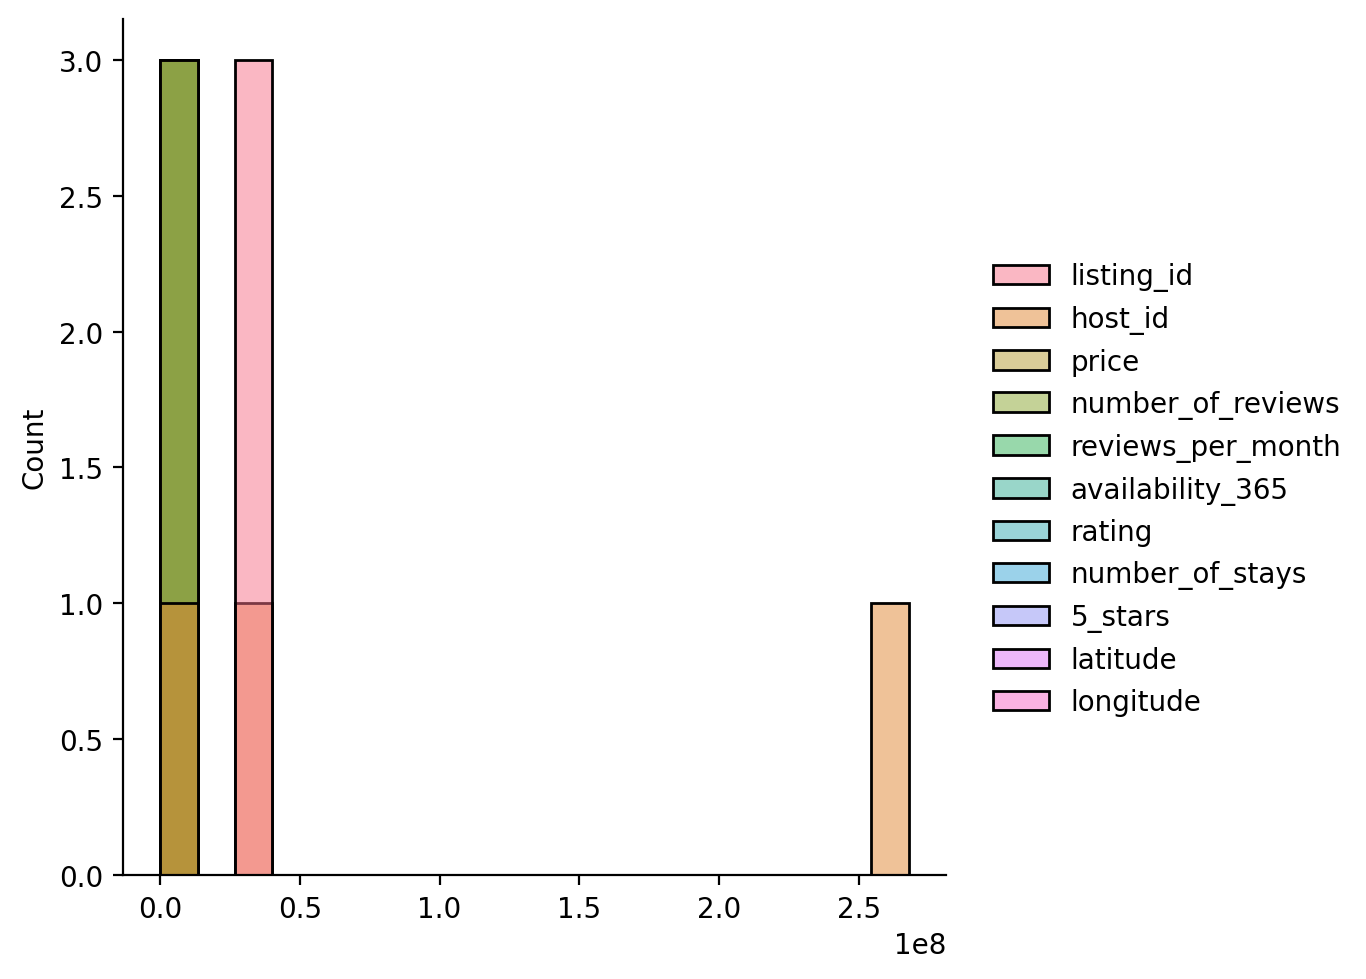

In [41]:
# Visualization of the elements of the rating column that have a value greater than 5 :
sns.displot(airbnb[airbnb['rating'] > 5.0], bins = 20)
plt.show()

In [42]:
# Droping these rows and make sure we have effected changes :
airbnb.drop(airbnb[airbnb['rating'] > 5.0].index, inplace = True)

# Making sure the rows had been deleted
airbnb[airbnb['rating'] > 5.0].info

<bound method DataFrame.info of Empty DataFrame
Columns: [listing_id, name, host_id, host_name, room_type, price, number_of_reviews, last_review, reviews_per_month, availability_365, rating, number_of_stays, 5_stars, listing_added, latitude, longitude, borough, neighbourhood]
Index: []>

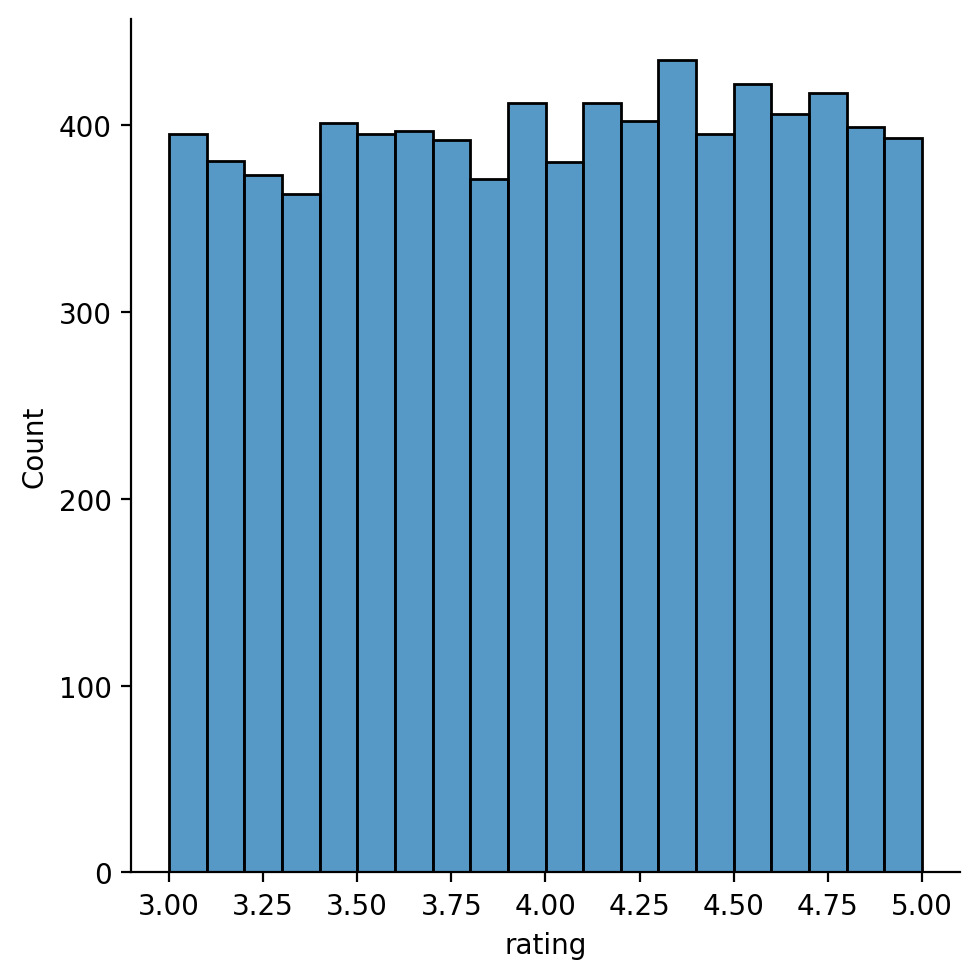

In [43]:
# Visualize the rating column again :
sns.displot(airbnb['rating'], bins = 20)
plt.show()

In [44]:
# Getting the maximum :
airbnb['rating'].max()

4.999561104773598

#### 7️⃣   `Task 7`  : Dealing with missing data :
>The **`missingno`** (imported as `msno`) package is great for visualizing missing data - we will be using :
> - **`msno.matrix()`** visualizes a missingness matrix.
> - **`msno.bar()`** visualizes a missngness barplot.
> - **`plt.show()`** to show the plot.

In [ ]:
# Visualizing the missingness :
msno.matrix(airbnb)
plt.show()

> Looking at the **missingness matrix**, we can see that missing values are almost identical between **`last_review`**, **`reviews_per_month`**, **`rating`**, **`number_of_stays`**, and **`5_stars`**. Let's confirm this further by sorting on **`rating`**.

In [ ]:
# Visualizing the missingness on sorted values :
msno.matrix(airbnb.sort_values(by = 'rating'))
plt.show()

In [ ]:
# Missingness barplot :
msno.bar(airbnb)

#### 7️⃣.1️⃣   `Task  7.1`  : Treating the `rating`, `number_of_stays`, `5_stars`, `reviews_per_month` columns : 

In [ ]:
# Understanding DataFrame with missing values in rating, number_of_stays, 5_stars, reviews_per_month :
airbnb[airbnb['rating'].isna()].describe()

In [ ]:
# Understanding DataFrame with no missing values in rating, number_of_stays, 5_stars, reviews_per_month :
airbnb[~airbnb['rating'].isna()].describe() 

>Looking at the missing data in the DataFrame - we can see that **`number_of_reviews`** across all missing rows is **0**. We can infer that these listings have never been visited - hence could be inferred they're inactive/have never been visited. 

>We can impute them as following:
> - Set **`NaN`** for **`reviews_per_month`**, **`number_of_stays`**, **`5_stars`** to **0**.
> - Since a **`rating`** did not happen, let's keep the column as is - but create a new column named **`rated`** that takes in **`1`** if **`yes`**, **`0`** if **`no`**.
> - We will also leave **`last_review`** as is.

In [ ]:
# Imputing missing data :
airbnb = airbnb.fillna({'reviews_per_month':0,
                        'number_of_stays':0,
                        '5_stars':0})

In [ ]:
# Creating is_rated column :
is_rated = np.where(airbnb['rating'].isna() == True, 0, 1)
airbnb['is_rated'] = is_rated
airbnb

#### 7️⃣.2️⃣   `Task  7.2`  : Treating the `price` column :

In [ ]:
# Investigating DataFrame with missing values in price :
airbnb[airbnb['price'].isna()].count()

In [ ]:
# Investigating DataFrame with missing values in price :
airbnb[airbnb['price'].isna()].describe()

In [ ]:
# Investigating DataFrame with missing values in price :
airbnb[~airbnb['price'].isna()].count()

From a common sense perspective, **the most predictive factor for a `room's price` is the `room_type` column**, so let's visualize how price varies by room type with `sns.boxplot()` which displays the following information:
<p align="center">
<img src="https://github.com/adelnehme/cleaning-data-in-python-live-training/blob/master/boxplot.png?raw=true" alt = "DataCamp icon" width="80%">
</p>


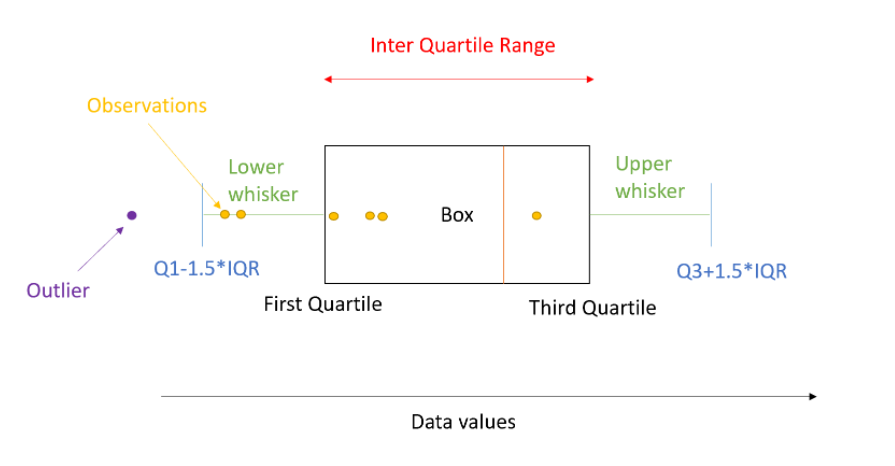

In [ ]:
# Visualizing the relationship between price and room_type :
sns.boxplot(x = 'room_type', y = 'price', data = airbnb)
plt.ylim(0, 500)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [ ]:
fig = px.box(x = airbnb['room_type'], y = airbnb['price'])
fig.show()

In [ ]:
# Getting median price per room_type :
airbnb.groupby('room_type').median()['price']

In [ ]:
# Imputing price based on conditions :
airbnb.loc[(airbnb['price'].isna()) & (airbnb['room_type'] == 'Entire place'), 'price'] = 163.0
airbnb.loc[(airbnb['price'].isna()) & (airbnb['room_type'] == 'Private Room'), 'price'] = 70.0
airbnb.loc[(airbnb['price'].isna()) & (airbnb['room_type'] == 'Shared Room'), 'price'] = 50.0

In [ ]:
airbnb[airbnb['price'].isna()]

In [ ]:
# Confirm price has been imputed
airbnb.isna().sum()

## 🆕  `What's still to be done ` ? 

> Although we have completed a significant number of data cleaning tasks, we still have a few issues to diagnose. When cleaning data, we need to consider :
> - Values that do not make any sense *(for example: are there values of **`last_review`** that older than **`listing_added`**? Are there listings in the future?*)
> - Presence of **duplicates values** - and how to deal with them?

#### 8️⃣   `Task  8`  : Do we have `consistent` date data ? 

In [ ]:
# Doing some sanity checks on date data :
today = dt.date.today()

In [ ]:
# Are there reviews in the future ?
airbnb[airbnb['last_review'].dt.date > today]

In [ ]:
# Are there listings in the future?
airbnb[airbnb['listing_added'].dt.date > today]

In [ ]:
# Dropping these rows since they are only 4 rows
airbnb = airbnb[~(airbnb['listing_added'].dt.date > today)]

In [ ]:
# Are there any listings with listing_added > last_review
inconsistent_dates = airbnb[airbnb['listing_added'].dt.date > airbnb['last_review'].dt.date]
inconsistent_dates

In [ ]:
# Dropping these rows since they are only 2 rows :
airbnb.drop(inconsistent_dates.index, inplace = True)

#### 9️⃣   `Task 9`  : Let's deal with duplicate data :
> There are two notable types of duplicate data :
> - Identical **duplicate data** across **all columns**.
> - Identical **duplicate data** cross **most** or **some** columns.

> To diagnose, and deal with duplicate data, we will be using the following methods and functions :
> - **`.duplicated(subset = , keep = )`**
>   - **`subset`** lets us pick one or more columns with duplicate values.
>   - **`keep`** returns lets us return all instances of duplicate values.
>   - **`.drop_duplicates(subset = , keep = )`**

In [ ]:
# Print the header of the DataFrame again :
airbnb.head()

In [ ]:
# Finding duplicates :
duplicates = airbnb.duplicated(subset = 'listing_id', keep = False)
print(duplicates)

In [ ]:
# Finding duplicates :
airbnb[duplicates].sort_values('listing_id')

In [ ]:
# Removing identical duplicates :
airbnb = airbnb.drop_duplicates()

In [ ]:
# Finding non-identical duplicates :
duplicates = airbnb.duplicated(subset = 'listing_id', keep = False)

In [ ]:
# Showing all duplicates :
airbnb[duplicates].sort_values('listing_id')

> To **treat identical duplicates across some columns**, we will chain the **`.groupby()`** and **`.agg()`** methods where we group by the column used to find duplicates **`listing_id`** and aggregate across statistical measures for **`price`**, **`rating`** and **`list_added`**. The **`.agg()`** method takes in a dictionary with each column's aggregation method 
> - we will use the following aggregations:
>   - **`mean`** for **`price`** and **`rating`** columns.
>   - **`max`** for **`listing_added`** column.
>   - **`first`** for all remaining column.


#### 📝 A note on `dictionary comprehensions`  :

> Dictionaries are useful data structures in Python with the following format
**`my_dictionary = {key: value}`** where a **`key`** is mapped to a **`value`** and whose **`value`** can be returned with **`my_dictionary[key]`** 
> - dictionary comprehensions allow us to programmatically create dicitonaries using the structure:
>```
{ x: x*2 for x in [1, 2, 3, 4, 5] } 
{ 1:2, 2:4, 3:6, 4:8, 5:10 }
```

In [ ]:
# Getting column names from airbnb :
column_names = airbnb.columns
column_names

In [ ]:
# Creating dictionary comprehension with 'first' as value for all columns not being aggregated :
aggregations = {column_name:'first' for column_name in column_names.difference(['listing_id', 'listing_added', 'rating', 'price'])}
aggregations['price'] = 'mean'
aggregations['rating'] = 'mean'
aggregations['listing_added'] = 'max'
aggregations

In [ ]:
# Removing non-identical duplicates :
airbnb = airbnb.groupby('listing_id').agg(aggregations).reset_index()

In [ ]:
# Making sure no duplication happened :
airbnb[airbnb.duplicated('listing_id', keep = False)]

In [ ]:
# Printing header of DataFrame ing
airbnb.head()

Notebook made by [@labriji_saad](https://github.com/labrijisaad) during data mining class.